题目：

对莺尾花数据用朴素贝叶斯分类

## 1.导入数据集

1.导入库

In [107]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler , PolynomialFeatures  # 对数据标准化
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB                          # 高斯朴素贝叶斯模型
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

2.导入数据集

In [108]:
iris = datasets.load_iris()     # 花的数据，sklearn中的数据库（就是上面的花）
X = iris.data[:,:2]             # X表示：花的属性 ; 切除最后一列
y = iris.target 

3.分离训练数据

In [109]:
x,x_test,y,y_test = train_test_split(X,Y,train_size = 0.7,random_state = 0)

## 2.模型学习

1.设置参数

In [110]:
priors = np.array((1,1,1),dtype = float)
priors /= priors.sum()

2.构造模型

In [111]:
gnb = Pipeline([
    ('sc',StandardScaler()),                     # 对特征标准化
    ('poly',PolynomialFeatures(degree = 2)),     # 多项式的和
    ('clf',GaussianNB(priors = priors))         # 高斯朴素贝叶斯
])

3.模型学习

In [112]:
gnb.fit(x,y.ravel()) # y.ravel()：将y转换为一维数组

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('clf',
                 GaussianNB(priors=array([0.33333333, 0.33333333, 0.33333333]),
                            var_smoothing=1e-09))],
         verbose=False)

4.给出预测值

In [113]:
y_hat = gnb.predict(x)   # 训练集

In [114]:
y_test_hat = gnb.predict(x_test)  # 测试集

5.给出得分

In [115]:
print('训练集得分：%.2f%%' % (100 * accuracy_score(y,y_hat)))

训练集得分：75.24%


In [116]:
print('测试集得分：%.2f%%' % (100 * accuracy_score(y_test,y_test_hat)))

测试集得分：77.78%


## 3.画图（不太会，好像用numpy和用pandas读取数据画图方式不一样）

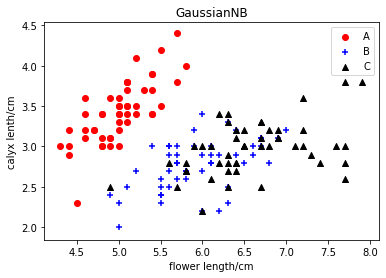

In [117]:
plt.scatter(X[Y==0,0],X[Y==0,1],color='r',label='A')
plt.scatter(X[Y==1,0],X[Y==1,1],color='b',marker='+',label='B')
plt.scatter(X[Y==2,0],X[Y==2,1],color='k',marker='^',label='C')

plt.legend()

plt.xlabel('flower length/cm')
plt.ylabel('calyx lenth/cm')
plt.title('GaussianNB')

plt.show()